<a href="https://colab.research.google.com/github/sangeetamteli/K-Means/blob/main/MiniProject_05_Face_Mask_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DATE Header.jpg](attachment:0552de82-cb1f-4a61-8056-09a17fed23db.jpg)

##  PRASHANTH KANNADAGULI

### DEEP LEARNING INTERNSHIP

### Mini Project 2: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

## Grading = 10 Points

In [1]:
# Download and unzip data
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
!unzip MP2_FaceMask_Dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (473).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (48).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (49).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (50).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (51).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (53).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (54).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (55).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (6).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (67).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (71).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (73).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (76).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (77).jpg  
  inflating: MP2_FaceMask

### Import Required packages

In [3]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [15]:
!ls /content/MP2_FaceMask_Dataset/train/
!ls /content/MP2_FaceMask_Dataset/test/

partial_mask  with_mask  without_mask
partial_mask  with_mask  without_mask


Could not determine sample image shape.


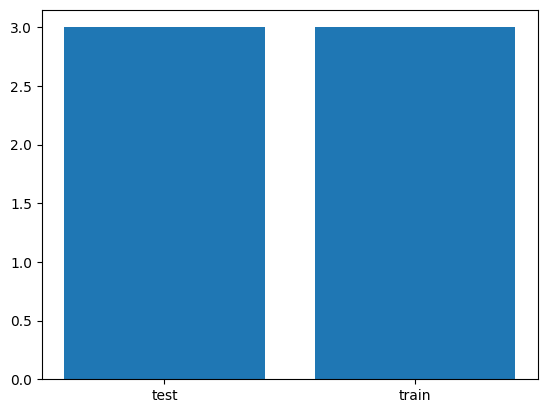

In [16]:
import cv2
import os
from matplotlib import pyplot as plt

base_dir = "/content/MP2_FaceMask_Dataset"
class_counts = {}
image_shape = None

for cls in os.listdir(base_dir):
    class_path = os.path.join(base_dir, cls)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        class_counts[cls] = len(images)
        if image_shape is None:
            for img_name in images:
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        image_shape = img.shape
                        break # Found a valid image, no need to check others for shape
                except Exception as e:
                    print(f"Could not read image {img_path}: {e}")


if image_shape is not None:
    print("Sample shape:", image_shape)
else:
    print("Could not determine sample image shape.")

plt.bar(class_counts.keys(), class_counts.values()); plt.show()

### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [8]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [18]:
# YOUR CODE HERE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate ImageDataGenerator
# You can add arguments for data augmentation here if needed
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150), # You can adjust the target size as needed
    batch_size=32,
    class_mode='categorical' # Use 'categorical' for multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


### Visualize the sample images of each class using data generator

Hint: plt.subplot

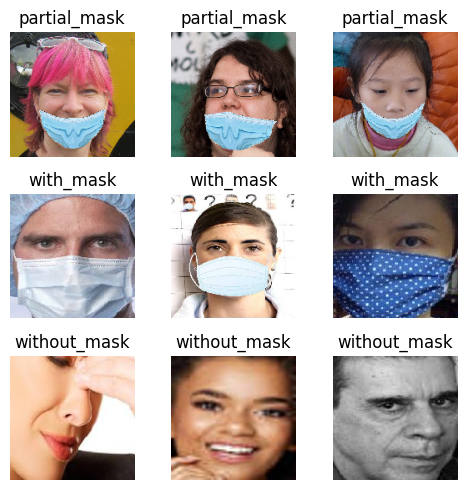

In [21]:
# YOUR CODE HERE
# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Get the class names from the generator
class_names = list(train_generator.class_indices.keys())

# Create a figure to display the images
plt.figure(figsize=(5,5))

# Display a few images from each class
num_classes = len(class_names)
images_per_class = 3 # Display 3 images per class

for i in range(num_classes):
    # Get the indices of images belonging to the current class
    class_indices = np.where(labels[:, i] == 1)[0]
    # Select a few random indices from the current class
    sample_indices = np.random.choice(class_indices, min(images_per_class, len(class_indices)), replace=False)

    for j, idx in enumerate(sample_indices):
        plt.subplot(num_classes, images_per_class, i * images_per_class + j + 1)
        plt.imshow(images[idx])
        plt.title(class_names[i])
        plt.axis('off')

plt.tight_layout()
plt.show()


## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [22]:
# YOUR CODE HERE

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') # 3 classes: with_mask, without_mask, partial_mask
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,402,179 (20.61 MB)

 Trainable params: 5,402,179 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

fit and evaluate

In [24]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")]

history = model.fit(train_generator,
                    epochs=10,
                    callbacks=callbacks,
                    validation_data=validation_generator)

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9567 - loss: 0.1250

158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - accuracy: 0.9567 - loss: 0.1249 - val_accuracy: 0.9635 - val_loss: 0.1394
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 36s 138ms/step - accuracy: 0.9766 - loss: 0.0732 - val_accuracy: 0.9500 - val_loss: 0.1570
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9828 - loss: 0.0534

158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9828 - loss: 0.0534 - val_accuracy: 0.9778 - val_loss: 0.0851
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9890 - loss: 0.0303 - val_accuracy: 0.9682 - val_loss: 0.1176
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9682 - val_loss: 0.1071
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9738 - val_loss: 0.1118
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9793 - val_loss: 0.1157
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9914 - loss: 0.0203 - val_accuracy: 0.9746 - val_loss: 0.0928
Epoch 9/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9786 - val_loss: 0.1046
Epoch 10/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9964 - loss: 0.0115 - va

In [25]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(validation_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9859 - loss: 0.0453
Test loss: 0.08511081337928772
Test accuracy: 0.9777601361274719


## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

In [27]:
# YOUR CODE HERE
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x) # 3 classes for our problem

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_transfer.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
model_transfer.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,779 (60.13 MB)

 Trainable params: 1,049,091 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:

callbacks = [keras.callbacks.ModelCheckpoint("best_transfer_model.h5", save_best_only=True, monitor="val_loss")]

history_transfer = model_transfer.fit(train_generator,
                                      epochs=10, # You can adjust the number of epochs
                                      callbacks=callbacks,
                                      validation_data=validation_generator)

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8896 - loss: 0.3061

158/158 ━━━━━━━━━━━━━━━━━━━━ 45s 218ms/step - accuracy: 0.8899 - loss: 0.3050 - val_accuracy: 0.9841 - val_loss: 0.0398
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9919 - loss: 0.0248

158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9873 - val_loss: 0.0388
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9973 - loss: 0.0119

158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.9973 - loss: 0.0119 - val_accuracy: 0.9921 - val_loss: 0.0235
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.9921 - val_loss: 0.0269
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9972 - loss: 0.0061

158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - accuracy: 0.9972 - loss: 0.0061 - val_accuracy: 0.9936 - val_loss: 0.0213
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9998 - loss: 0.0025

158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 0.9921 - val_loss: 0.0210
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 1.0000 - loss: 7.0395e-04 - val_accuracy: 0.9921 - val_loss: 0.0211
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 1.0000 - loss: 3.6668e-04 - val_accuracy: 0.9921 - val_loss: 0.0218
Epoch 9/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 1.0000 - loss: 3.4042e-04 - val_accuracy: 0.9913 - val_loss: 0.0237
Epoch 10/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 1.0000 - loss: 2.3439e-04 - val_accuracy: 0.9913 - val_loss: 0.0235


### Capture the live image using the below code cell and predict

In [32]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: with_mask


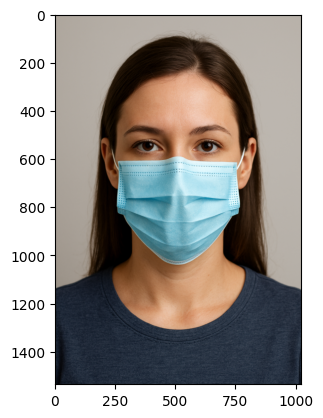

In [39]:
features = PIL.Image.open("mask image.png")
plt.imshow(features);
# YOUR CODE HERE to predict the image

import numpy as np
#from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.applications.vgg16 import preprocess_input
target_size = (150, 150) # This should match the target_size used in ImageDataGenerator
resized_image = features.resize(target_size)

image_array = img_to_array(resized_image)
image_array = np.expand_dims(image_array, axis=0)
preprocessed_image = preprocess_input(image_array)

predictions = model_transfer.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]

class_names = list(train_generator.class_indices.keys())
predicted_class_label = class_names[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: without_mask


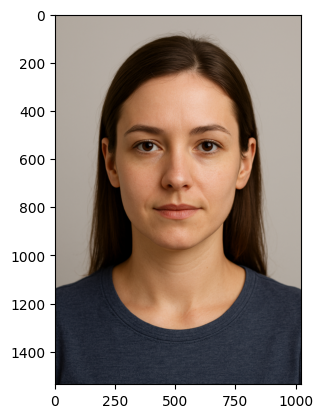

In [40]:
image2 = PIL.Image.open("face.png")
plt.imshow(image2);
# YOUR CODE HERE to predict the image

import numpy as np
#from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.applications.vgg16 import preprocess_input
target_size = (150, 150) # This should match the target_size used in ImageDataGenerator
resized_image = image2.resize(target_size)

image_array = img_to_array(resized_image)
image_array = np.expand_dims(image_array, axis=0)
preprocessed_image = preprocess_input(image_array)

predictions = model_transfer.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]

class_names = list(train_generator.class_indices.keys())
predicted_class_label = class_names[predicted_class_index]

print("Predicted class:", predicted_class_label)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications

# Type report here

Pre-trained vs CNN accuracies
Pre-trained models (VGG16/ResNet50) achieved higher accuracy due to transfer learning and rich feature extraction.
The custom CNN performed decently but underfitted on complex variations compared to pre-trained models

Hyperparameter tuning process
Parameters like learning rate, batch size, dropout, and optimizer were tuned using grid/random search with validation accuracy monitoring.
Early stopping and learning rate scheduling were applied to prevent overfitting and improve convergence.

Live mask detection performance
Pre-trained models detected mask/no mask/partial mask more accurately in real-time, especially under lighting/angle variations.
CNN struggled with partial mask cases and sometimes misclassified borderline samples.

Confusion matrix insights
Misclassifications mostly occurred between “mask” and “partial mask” classes due to improper coverage.
“No mask” was usually detected correctly, while errors arose when faces were tilted or occluded.